In [1]:
# 45 degree angle and 135 degree angle
# this means that ther is a slope going upwards where x = y
# when x = y, there is 45 degree angles on either side which means 135 for 
# other rhombus angle
# so slope is x = y which means x = 1 and y = 1

In [1]:
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 
import numpy as np
import graphviz
from graphviz import Digraph
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [8]:
npts = 10000

X1 = np.zeros((npts,2))
y1 = np.zeros(npts)

for i in range(0,npts): 
    X1[i,0] = np.random.uniform(0.0,2.0) 
    X1[i,1] = np.random.uniform(0.0,2.0)
    
    if (X1[i,1]>=0.0) and X1[i,0]/X1[i,1]>=0.75 and (X1[i,1]<=0.75) and (2-X1[i,0])/(1-X1[i,1]) >= 0.75:
        y1[i] = 1
    else:
        y1[i] = 0


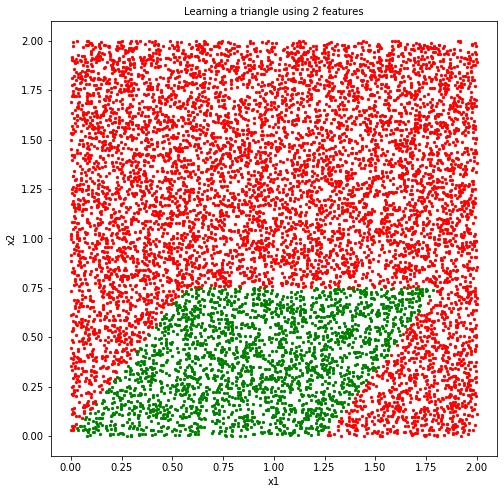

In [9]:
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning a triangle using 2 features', fontsize='medium')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x = X1[y1==0, 0], y = X1[y1==0, 1], color='red', label='0', s=5)
plt.scatter(x = X1[y1==1, 0], y = X1[y1==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(
         X1, y1, test_size=0.50, random_state=0)

In [6]:
MaxDepth = 10
DotFileName ='T5.dot'
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X1_train, y1_train)

    X1_combined = np.vstack((X1_train, X1_test))
    y1_combined = np.hstack((y1_train, y1_test))

    # optional outputs
    z = tree.apply(X1_combined)
    #print(z)
    dp = tree.decision_path(X1_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X1_train,y1_train)
    Errors[i,1] = 1 - tree.score(X1_test,y1_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.18079999999999996 0.17859999999999998
2 0.1804 0.1956
3 0.10240000000000005 0.11619999999999997
4 0.06940000000000002 0.08279999999999998
5 0.06320000000000003 0.07740000000000002
6 0.036800000000000055 0.04920000000000002
7 0.01759999999999995 0.027000000000000024
8 0.009399999999999964 0.019199999999999995
9 0.0033999999999999586 0.012599999999999945
10 0.0008000000000000229 0.010399999999999965


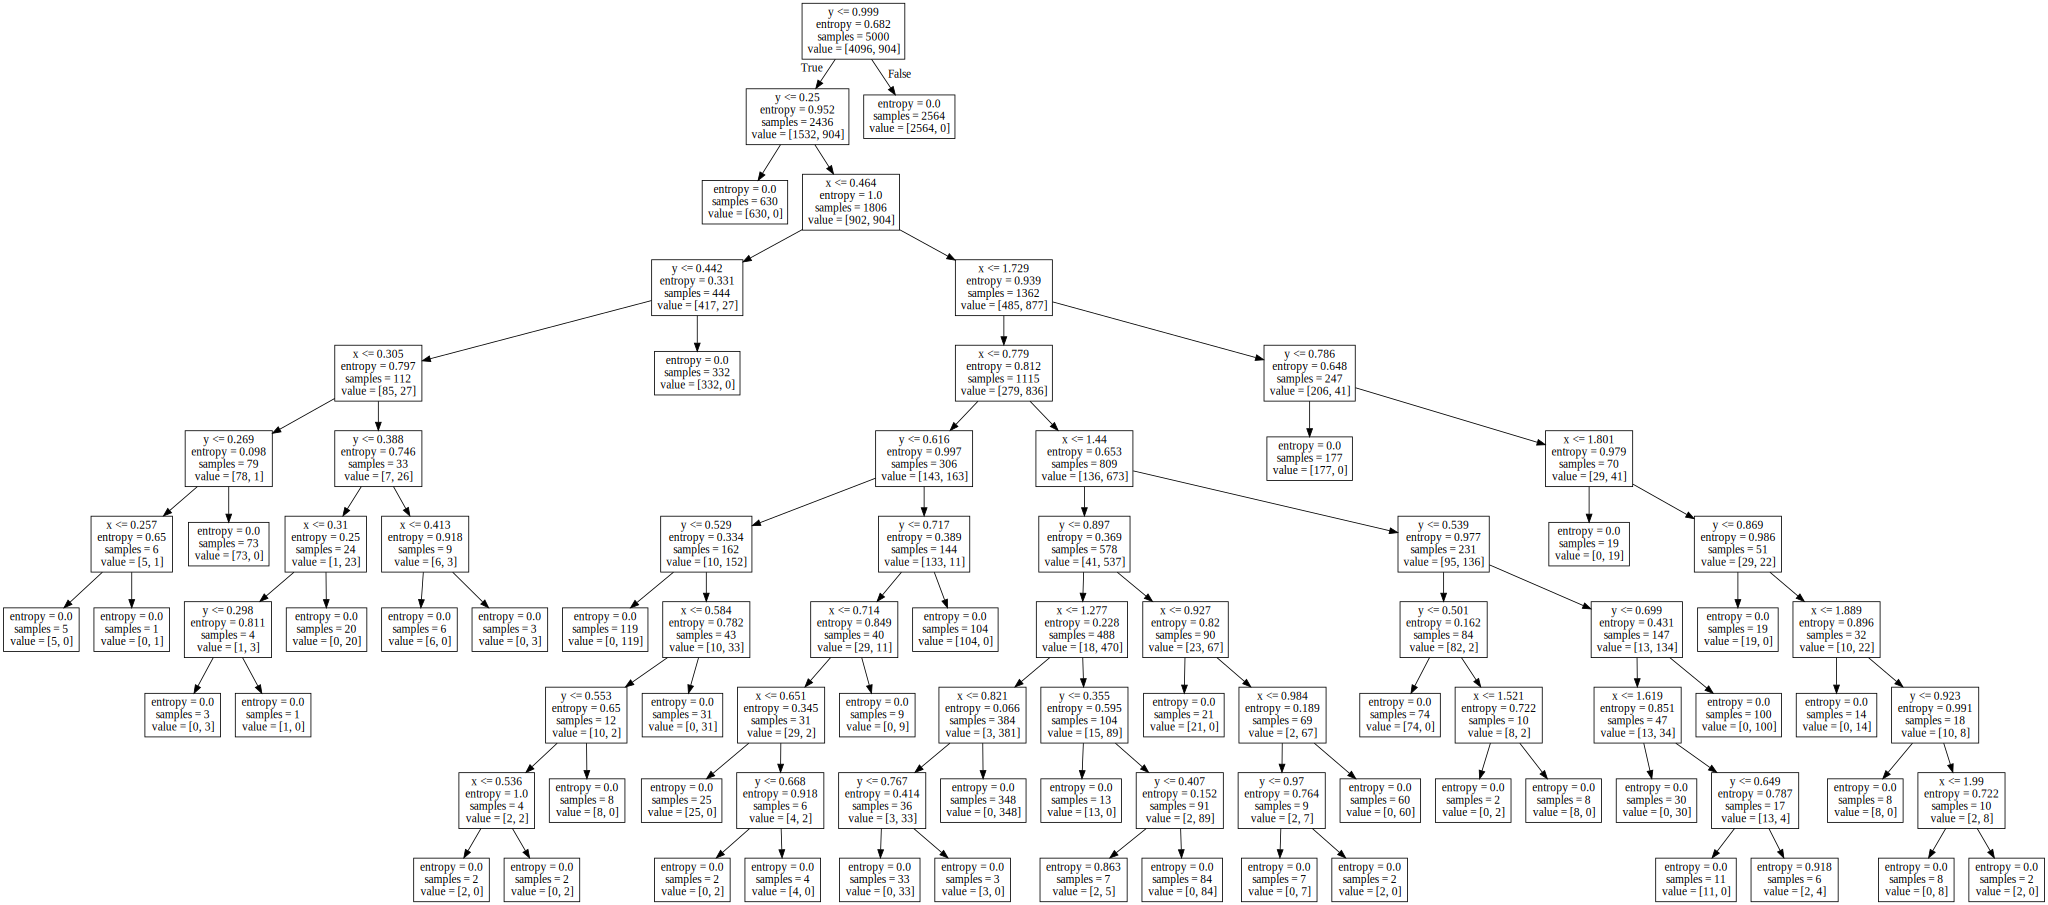

In [7]:
export_graphviz(tree, out_file='TQ1.dot', feature_names=['x','y'])
with open('TQ1.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

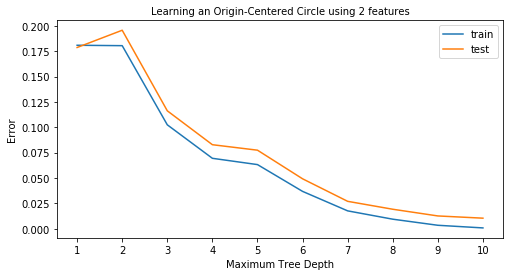

In [8]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Origin-Centered Circle using 2 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

# 5 features

In [9]:
npts = 10000

X2 = np.zeros((npts,5))
y2 = np.zeros(npts)

for i in range(0,npts): 
    X2[i,0] = np.random.uniform(0.0,2.0) 
    X2[i,1] = np.random.uniform(0.0,2.0)
    X2[i,2] = X2[i,0]**2
    X2[i,3] = X2[i,0]*X2[i,1]
    X2[i,4] = X2[i,1]**2 
    
    if (X2[i,1]>=0.25) and X2[i,0]/X2[i,1]>=1 and (X2[i,1]<=1) and (2-X2[i,0])/(1-X2[i,1]) >= 1:
        y2[i] = 1
    else:
        y2[i] = 0


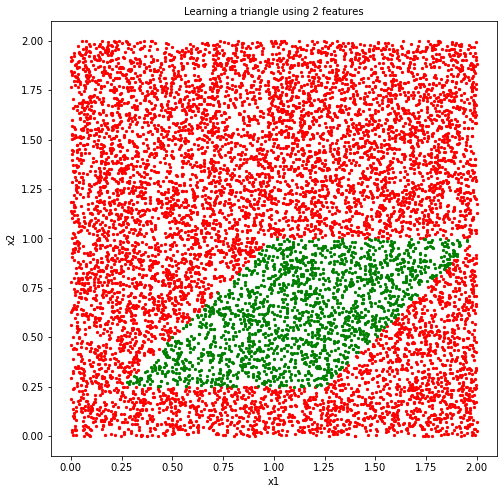

In [10]:
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning a triangle using 2 features', fontsize='medium')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x = X2[y2==0, 0], y = X2[y2==0, 1], color='red', label='0', s=5)
plt.scatter(x = X2[y2==1, 0], y = X2[y2==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

In [11]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
         X2, y2, test_size=0.50, random_state=0)

In [12]:
MaxDepth = 10
DotFileName ='T5.dot'
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X2_train, y2_train)

    X2_combined = np.vstack((X2_train, X2_test))
    y2_combined = np.hstack((y2_train, y2_test))

    # optional outputs
    z = tree.apply(X2_combined)
    #print(z)
    dp = tree.decision_path(X2_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X2_train,y2_train)
    Errors[i,1] = 1 - tree.score(X2_test,y2_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.1926 0.17700000000000005
2 0.18500000000000005 0.19879999999999998
3 0.10399999999999998 0.11960000000000004
4 0.06879999999999997 0.07840000000000003
5 0.05740000000000001 0.07120000000000004
6 0.03059999999999996 0.03920000000000001
7 0.02180000000000004 0.028000000000000025
8 0.007199999999999984 0.01880000000000004
9 0.005199999999999982 0.015599999999999947
10 0.0020000000000000018 0.010199999999999987


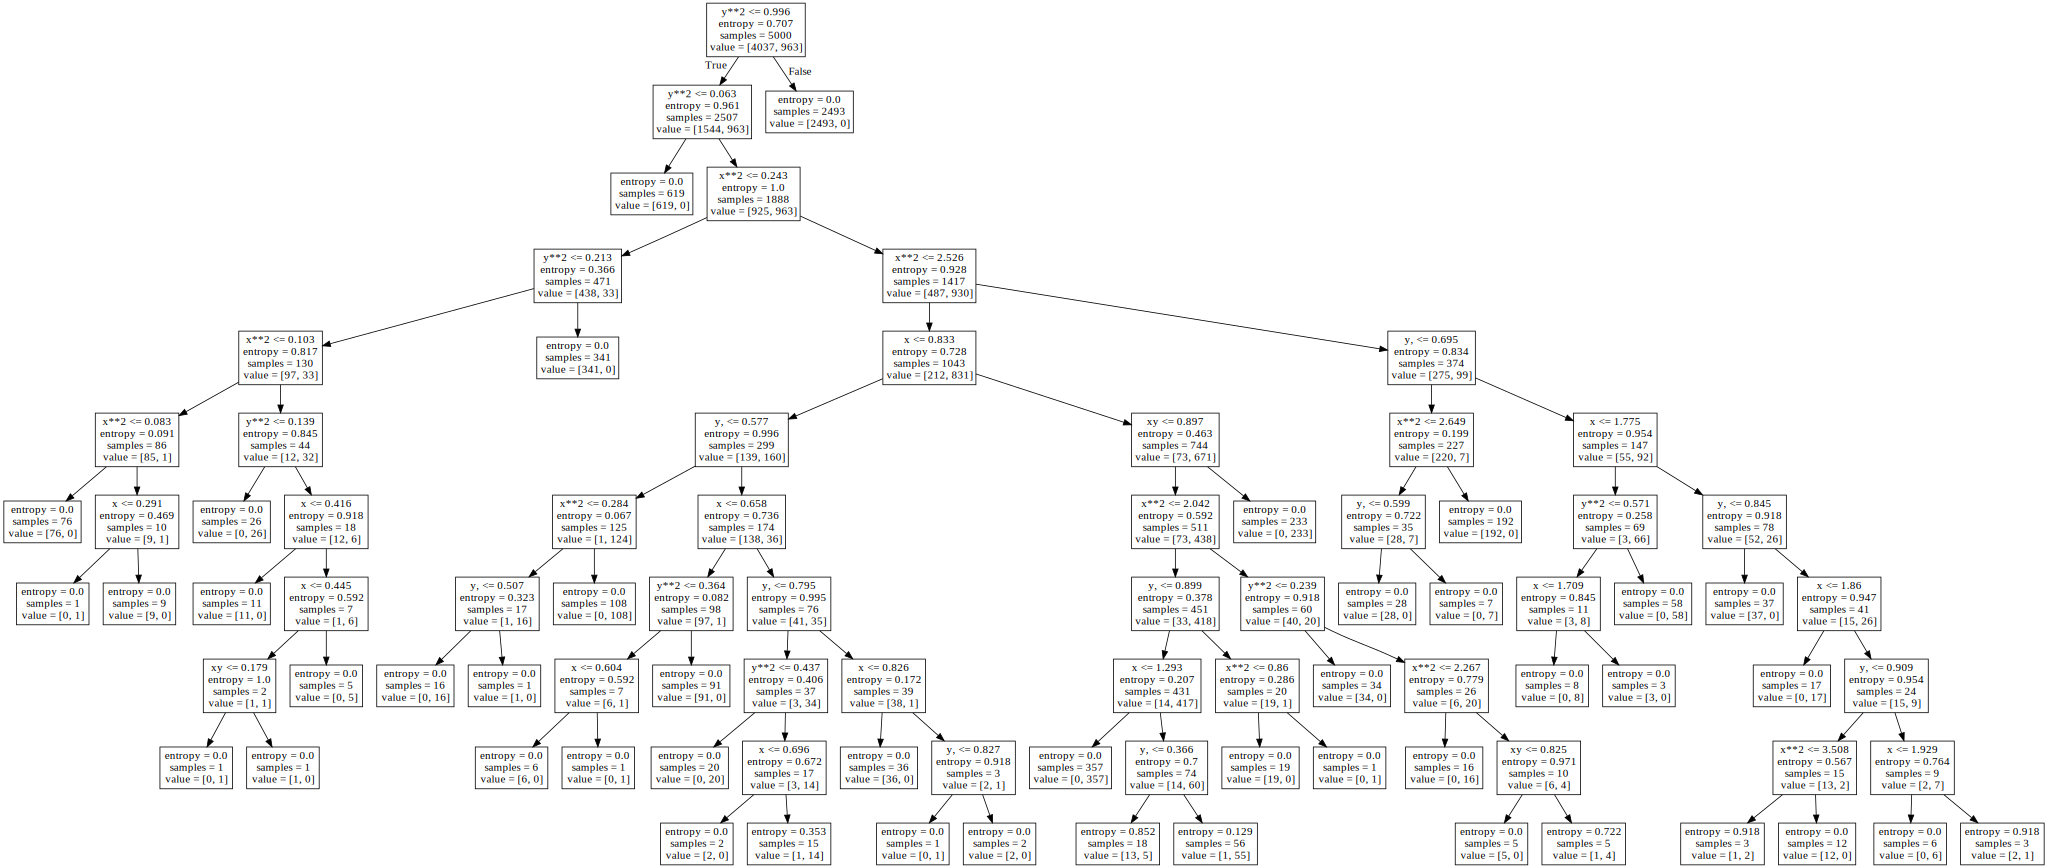

In [13]:
export_graphviz(tree, out_file='t5a.dot', feature_names=['x','y,','x**2','xy','y**2'])
with open('T5a.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

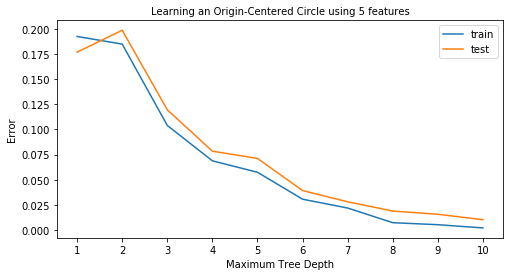

In [14]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Origin-Centered Circle using 5 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

# 6 feature

In [15]:
npts = 10000

X3 = np.zeros((npts,6))
y3 = np.zeros(npts)

for i in range(0,npts): 
    X3[i,0] = np.random.uniform(0.0,2.0) 
    X3[i,1] = np.random.uniform(0.0,2.0)
    X3[i,2] = X3[i,0]**2
    X3[i,3] = X3[i,0]*X2[i,1]
    X3[i,4] = X3[i,1]**2 
    X3[i,5] = X3[i,0]**2+X3[i,1]**2
    
    if (X3[i,1]>=0.25) and X3[i,0]/X3[i,1]>=1 and (X3[i,1]<=1) and (2-X3[i,0])/(1-X3[i,1]) >= 1:
        y3[i] = 1
    else:
        y3[i] = 0

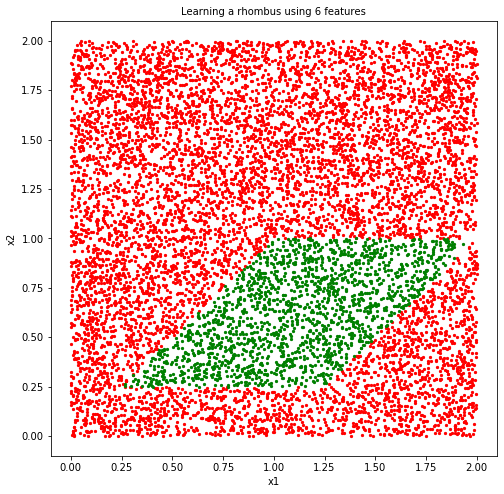

In [16]:
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning a rhombus using 6 features', fontsize='medium')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x = X3[y3==0, 0], y = X3[y3==0, 1], color='red', label='0', s=5)
plt.scatter(x = X3[y3==1, 0], y = X3[y3==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

In [17]:
X3_train, X3_test, y3_train, y3_test = train_test_split(
         X3, y3, test_size=0.50, random_state=0)

In [18]:
# Fit for various depth trees
MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X3_train, y3_train)

    X3_combined = np.vstack((X3_train, X3_test))
    y3_combined = np.hstack((y3_train, y3_test))

    # optional outputs
    z = tree.apply(X3_combined)
    #print(z)
    dp = tree.decision_path(X3_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X3_train,y3_train)
    Errors[i,1] = 1 - tree.score(X3_test,y3_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.18400000000000005 0.17720000000000002
2 0.18400000000000005 0.17720000000000002
3 0.11780000000000002 0.11819999999999997
4 0.07540000000000002 0.08340000000000003
5 0.06520000000000004 0.07020000000000004
6 0.03159999999999996 0.03839999999999999
7 0.0232 0.03059999999999996
8 0.008600000000000052 0.014399999999999968
9 0.0048000000000000265 0.01100000000000001
10 0.0018000000000000238 0.008399999999999963


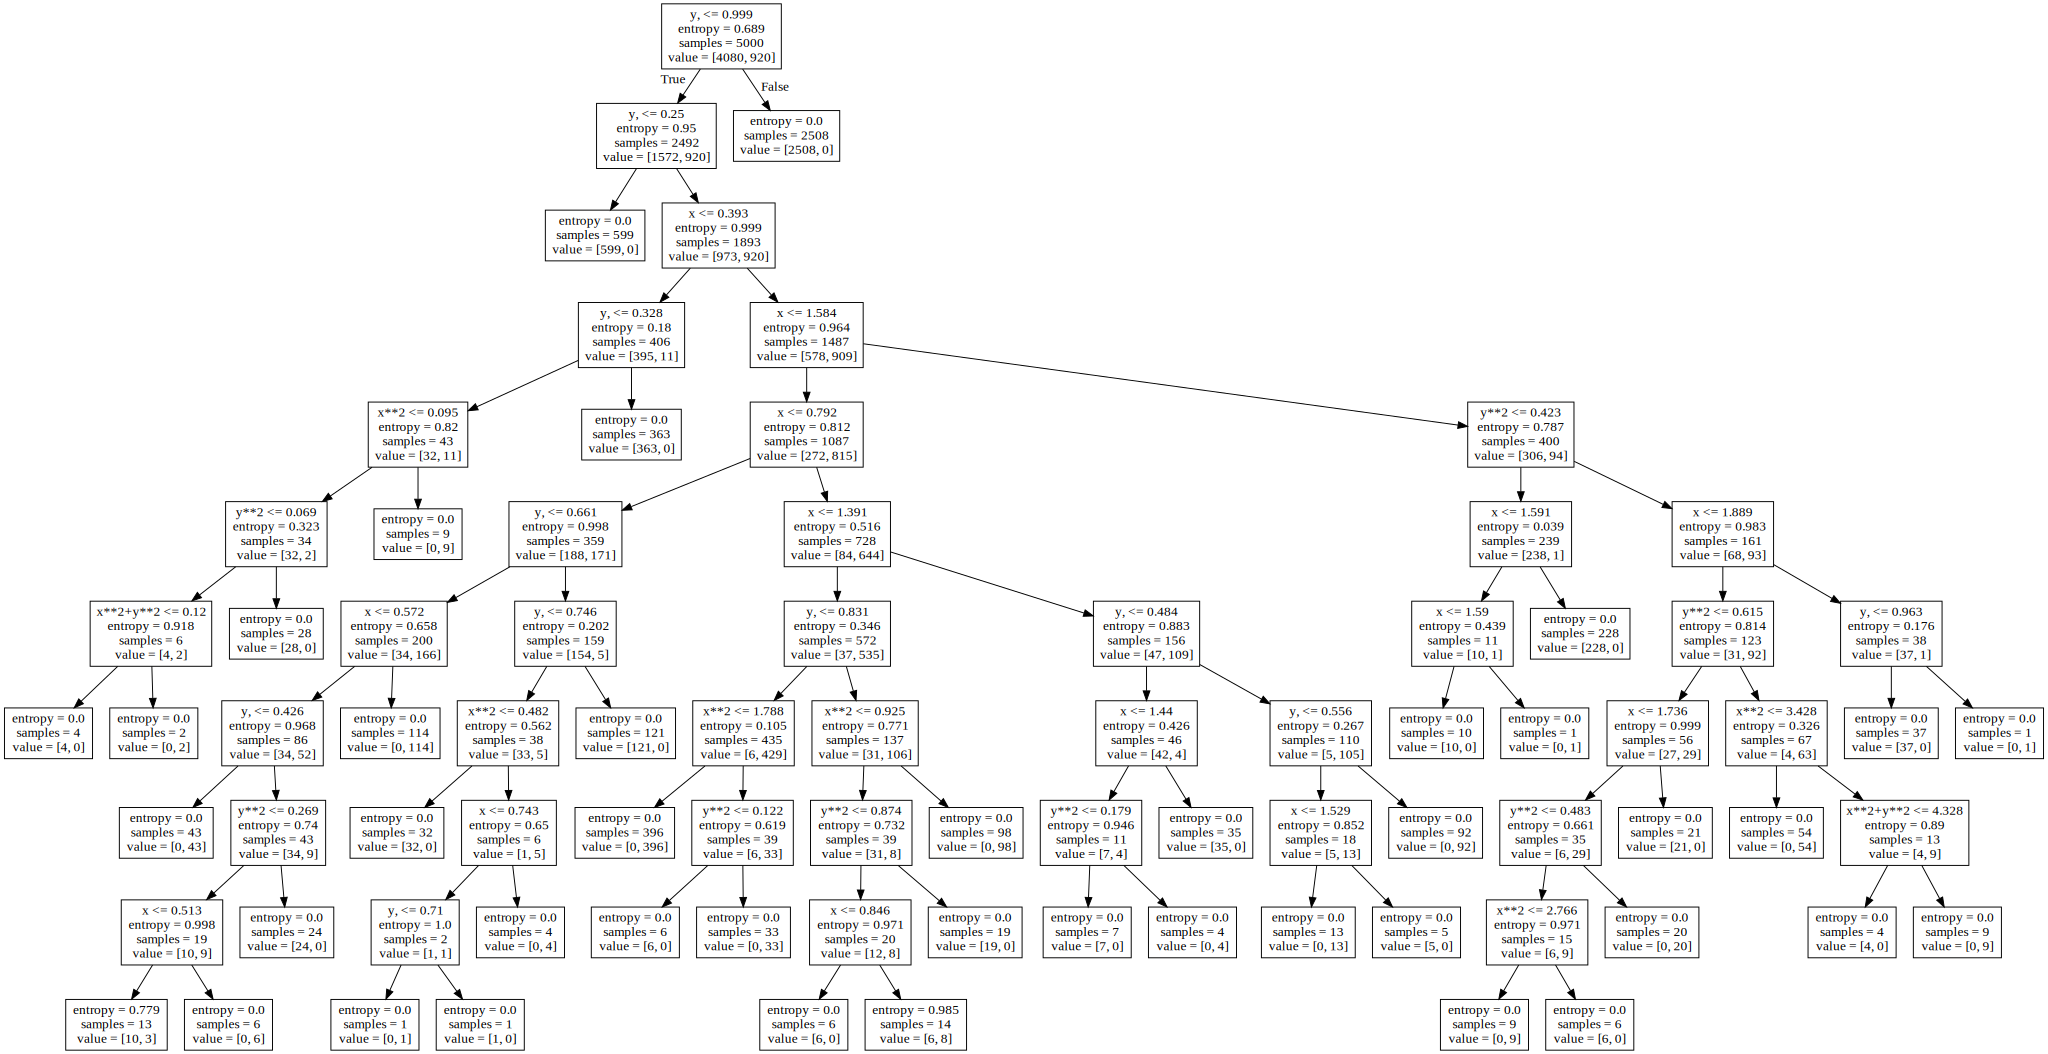

In [19]:
export_graphviz(tree, out_file='T6.dot', feature_names=['x','y,','x**2','xy','y**2','x**2+y**2'])
with open('T6.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

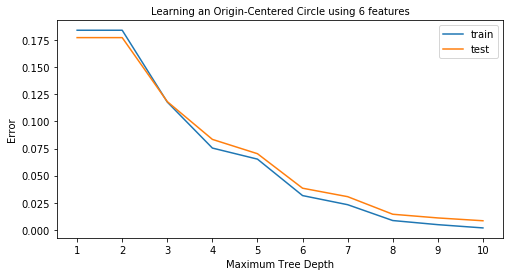

In [20]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Origin-Centered Circle using 6 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

# Discussion

For my data, creating a rhombus was thinking about how the slopes act like. Since we need angles of 45 degrees and 135 degrees, this meants that y = x. I came to this conclussion by thinking about how to create a 45 degree line in which i found out that 90 - 45 = 45 which means that y = x in order for that to happen and if you get 45, you also get 135 to create that 180 degree line

Furthermore, for this current test run i have completed, it shows that as more features are used, the closer the training data is to the test. However, in previous tests, it showed that it is possible that having more features does not mean more accurate training data. In the previous training run completed, it showed that using 5 features turned out more accurate than 6 features so luck seems to be a requirement? But putting luck aside, the outcome still is the same as the train data got more accurate and started to converge with the test data line.